IMDB Dataset Sample: Print the first 5 samples
Review  1 : the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5113 - loss: 0.7140 - val_accuracy: 0.5416 - val_loss: 0.6857
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5373 - loss: 0.6870 - val_accuracy: 0.5294 - val_loss: 0.6850
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5665 - loss: 0.6778 - val_accuracy: 0.5680 - val_loss: 0.6739
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5873 - loss: 0.6647 - val_accuracy: 0.5756 - val_loss: 0.6653
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6322 - loss: 0.6401 - val_accuracy: 0.5828 - val_loss: 0.6507
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5764 - loss: 0.6546
Test accuracy: 0.5748400092124939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Positive text sentiment: 0.45107293
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Negative text sentiment: 0.48294353


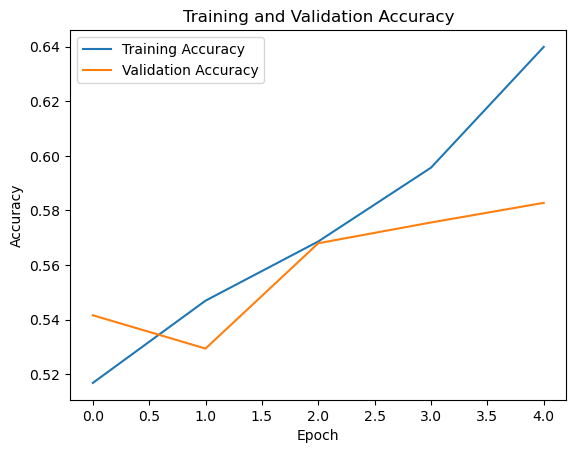

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN


max_features = 10000
maxlen = 200  

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


word_index = imdb.get_word_index()

index_to_word = {idx: word for word, idx in word_index.items()}



print("IMDB Dataset Sample: Print the first 5 samples")
for i in range(5):  
    words = [index_to_word.get(idx, '?') for idx in x_train[i]]
    review_text = ' '.join(words)

    print("Review ", i+1, ":", review_text)
    print("Sentiment:", y_train[i])
    print()


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)



embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim,
                    input_length=maxlen))
model.add(SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", accuracy)




def predict_sentiment(text):
   
    word_to_index = imdb.get_word_index()
    words = text.split()
    sequence = [word_to_index[word] if word in word_to_index and
                word_to_index[word] < max_features else 0 for word in words]
    sequence = pad_sequences([sequence], maxlen=maxlen)

    prediction = model.predict(sequence)[0][0]
    return prediction



positive_text = "This movie was fantastic, I loved every moment of it!"
negative_text = "I couldn't stand this movie, it was terrible."
print("Positive text sentiment:", predict_sentiment(positive_text))
print("Negative text sentiment:", predict_sentiment(negative_text))




import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import yfinance as yf

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

ticker = 'AAPL'
data = fetch_stock_data(ticker, start_date='2010-01-01', end_date='2023-01-01')
print(data.head())

data = data.sort_index()
data = data[['Open', 'Close']]
dataset = data.values

training_data_len = int(np.ceil(len(dataset) * .8))

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

test_data = scaled_data[training_data_len - 60:, :]

x_test = []

C:\Users\Admin\AppData\Local\Temp\ipykernel_8580\2771654035.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.418384  6.433080  6.369499  6.400989  493729600
2010-01-05  6.429481  6.465770  6.395591  6.436079  601904800
2010-01-06  6.327211  6.454973  6.320613  6.429481  552160000
2010-01-07  6.315513  6.358101  6.269627  6.350603  477131200
2010-01-08  6.357502  6.358103  6.269929  6.307118  447610800


KeyError: "['ticker'] not in index"

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import yfinance as yf

def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

ticker = 'AAPL'
data = fetch_stock_data(ticker, '2010-01-01', '2023-01-01')
print(data.head())

# We only use Open price
data = data[['Open']]

# Convert to numpy
dataset = data.values

# Length of training data (80%)
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training data
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input [samples, timesteps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]  # Actual values (unscaled)

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Print results
print("Predictions:\n", predictions[:5])



C:\Users\Admin\AppData\Local\Temp\ipykernel_8580\937923675.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.418384  6.433080  6.369499  6.400989  493729600
2010-01-05  6.429481  6.465770  6.395591  6.436079  601904800
2010-01-06  6.327211  6.454973  6.320613  6.429481  552160000
2010-01-07  6.315513  6.358101  6.269627  6.350603  477131200
2010-01-08  6.357502  6.358103  6.269929  6.307118  447610800
2558/2558 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 7.7728e-04
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions:
 [[67.98339]
 [68.05042]
 [68.04348]
 [68.20725]
 [68.60601]]
